## Project Submission


### *Business Problem*

The main purpose of the project is to develop a pricing algorithm to help set/predict a target price for the houses in the agency. The goal is to save the company some time and to help ensure consistency in pricing with consideration of the attributes the house has to offer.

Also identify the variable that impact the price of the house the most.

In [1]:
# organize and sort imports in your Python code 
!pip install isort

In [2]:
import isort

In [3]:
code = '''
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
'''

sorted_code = isort.code(code)

In [4]:
# Displaying the sorted code
from IPython.core.display import HTML
display(HTML('<code>' + sorted_code.replace('\n', '<br>') + '</code>'))

In [5]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import math

import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, PolynomialFeatures,
                                   StandardScaler)
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# loading the data into a pandas dataframe
house_df = pd.read_csv('data/kc_house_data.csv' ,index_col = 0)

In [7]:
#displaying first few records
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
# making a copy of the dataset.
house_df_copy = house_df.copy()

In [9]:
#Displaying the first few rows
house_df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
#Displaying the last few rows
house_df_copy.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [11]:
# Removing some columns
non_informational_features = ['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode',
'lat','long','sqft_living15','sqft_lot15','date']

house_df_copy =  house_df_copy.drop(non_informational_features, axis=1)

In [12]:
#Confirming the drop of the columns
house_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


Number of columns reduced by 9 dropped columns.

Waterfront column contains null values.

The date column datatype is an object.

Condition column stated as int 


### *Srubbing and cleaning*

The following should be achieved:
    
- Ensuring columns are the right data types

- Identifying and dealing with null value

- Determining multicollinearity and removing necessary columns

- Normalizing Data

#### Dealing with data types

In [13]:
#confirming datatypes
house_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


All available columns seems to have the correct datatypes.

#### *Detecting and dealing with null values*

In [14]:
#Checking for null values and retriveing as a summary of each column
house_df_copy.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [15]:
# 2376 waterfront values are null
# To find out the unique values  0 could mean none 1 could mean presence of a waterfront
house_df_copy['waterfront'].unique()

array([nan,  0.,  1.])

In [16]:
# we can drop the null values since there is no elaborate method to determine if the house 
# has a waterfront to fill missing values.
house_df_copy = house_df_copy.dropna()

In [17]:
house_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 6414100192 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [18]:
house_df_copy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


#### *Multicolinearity*

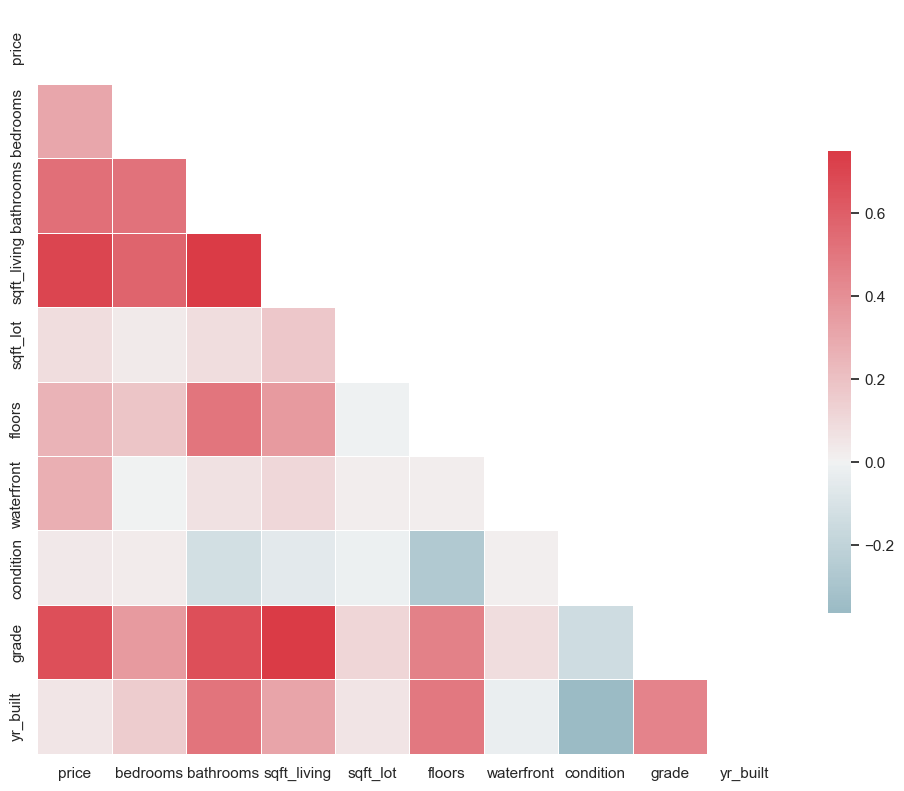

In [19]:
#Creating a heatmap that show the correlation between the diffrent variables.
sns.set(style = 'white')

corr = house_df_copy.corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize= (12,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .75, center = 0, square = True, linewidth = .5, cbar_kws = {'shrink':.5})

plt.show()

In [20]:
#Verifying the variables that could be having high colinearity from the map above sqft_living and grade seems to be high.
abs(house_df_copy.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,False,True,False,False
grade,False,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,False,True


In [28]:
# Retrieving the variable pairs from the correlation matrix that have correlations over .75, but less than 1.
highly_correlated_variables_df = (
                                dff_houses
                                .corr()
                                .abs()
                                .stack()
                                .reset_index()
                                .sort_values(0, ascending=False)
                                )
highly_correlated_variables_df['variable_pairs'] =  list(zip(highly_correlated_variables_df.level_0,
                                                             highly_correlated_variables_df.level_1))
highly_correlated_variables_df = (highly_correlated_variables_df
                                  .set_index(['pairs']
                                             .drop(columns=['level_1', 'level_0'])
                                            )
                                  
highly_correlated_variables_df .columns = ['correlation_coefficient']
highly_correlated_variables_df = highly_correlated_variables_df.drop_duplicates()
filter_condition = (highly_correlated_variables_df.correlation_coefficient > .75) & 
                                  (highly_correlated_variables_df.correlation_coefficient < 1)
highly_correlated_variables_df[filter_condition]

SyntaxError: invalid syntax (4243381734.py, line 17)

From th pairing retrieval three variables may cause collinearity. Further inspection with an absolute correlation value of .75 suggest that sqft living room is highly correlated with the bathrooms & grade, so dropping this column is wise.

In [18]:
#removing sqft_living from dff_houses in order to reduce collinear features.
house_df_copy.drop(columns=['sqft_living'], inplace=True)

In [19]:
#verifying the drop.
house_df_copy

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,
6414100192,538000.0,3,2.25,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,8080,1.0,0.0,3,8,1987
7237550310,1230000.0,4,4.50,101930,1.0,0.0,3,11,2001
...,...,...,...,...,...,...,...,...,...
2997800021,475000.0,3,2.50,1294,2.0,0.0,3,8,2008
263000018,360000.0,3,2.50,1131,3.0,0.0,3,8,2009
6600060120,400000.0,4,2.50,5813,2.0,0.0,3,8,2014


#### *Normalization*

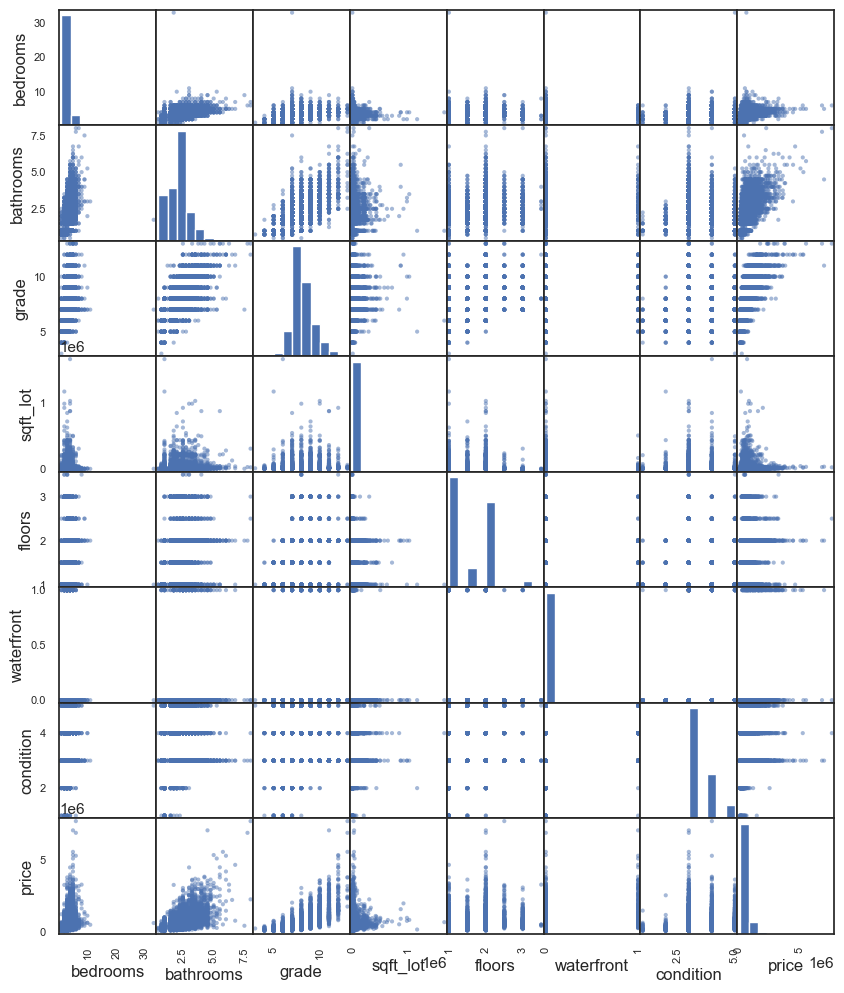

In [20]:
x_cols = ['bedrooms','bathrooms', 'grade', 'sqft_lot', 'floors','waterfront', 'condition','price']
# Checking distributions
pd.plotting.scatter_matrix(house_df_copy[x_cols], figsize=(10,12));

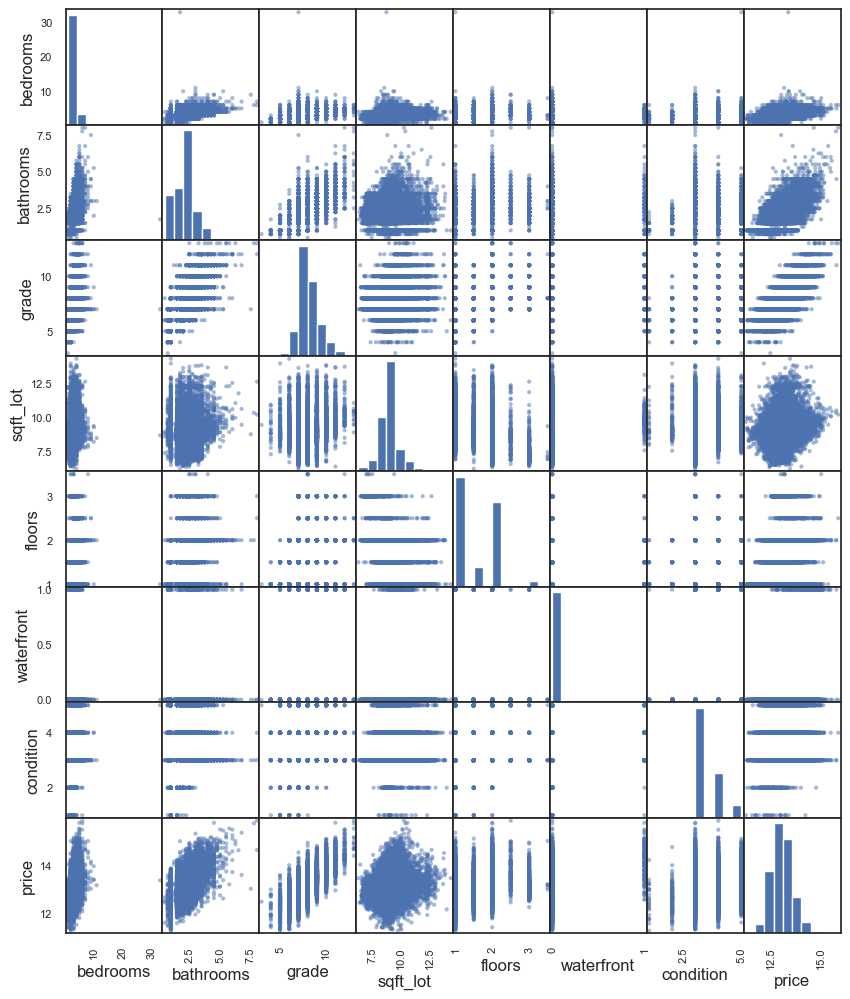

In [21]:
#Tranforming the non normal features this to deal with skwenedd which might affect the output of modelling.
non_normal = ['sqft_lot', 'price']
for feat in non_normal:
    house_df_copy[feat] = house_df_copy[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(house_df_copy[x_cols], figsize=(10,12));

In [22]:
#decription of the data after normalization
house_df_copy.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
count,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,13.049567,3.374642,2.117072,8.991611,1.495031,0.007596,3.409968,7.661048,1971.039800
std,0.527405,0.928539,0.769576,0.902919,0.540155,0.086825,0.650280,1.175998,29.384666
min,11.264464,1.000000,0.500000,6.253829,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,12.682307,3.000000,1.750000,8.525161,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,13.017003,3.000000,2.250000,8.938532,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,13.375454,4.000000,2.500000,9.279493,2.000000,0.000000,4.000000,8.000000,1997.000000
max,15.856731,33.000000,8.000000,14.317109,3.500000,1.000000,5.000000,13.000000,2015.000000


### *Exploring the Data*

Investigating the distributions of some of the various features and their relationship to the target variable: price.

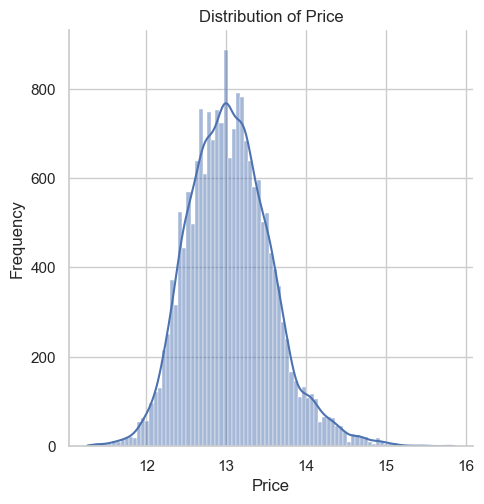

In [23]:
# Set plot style
sns.set_style("whitegrid")

# Create distribution plot
sns.displot(house_df_copy['price'], kde=True)

# Set plot title and labels
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Show plot
plt.show()

The prices are almost normally distributed.This was after normalizaing the data.

In [24]:
# Creating visuals to see the distiburion of the variables.
# Creating a varible to hold the numeric values
var_lst = house_df_copy.select_dtypes(include=['float64', 'int64'])

In [25]:
var_lst

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,
6414100192,13.195614,3,2.25,8.887653,2.0,0.0,3,7,1951
5631500400,12.100712,2,1.00,9.210340,1.0,0.0,3,6,1933
2487200875,13.311329,4,3.00,8.517193,1.0,0.0,5,7,1965
1954400510,13.142166,3,2.00,8.997147,1.0,0.0,3,8,1987
7237550310,14.022525,4,4.50,11.532042,1.0,0.0,3,11,2001
...,...,...,...,...,...,...,...,...,...
2997800021,13.071070,3,2.50,7.165493,2.0,0.0,3,8,2008
263000018,12.793859,3,2.50,7.030857,3.0,0.0,3,8,2009
6600060120,12.899220,4,2.50,8.667852,2.0,0.0,3,8,2014


In [26]:
hist_columns = ['bedrooms','bathrooms', 'grade', 'sqft_lot','floors','waterfront','condition','yr_built']

In [27]:
# create a scatter matrix for all numeric variables in the dataset in relation to price
def scatter_plots(house_df_copy,var_lst):
    fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(20,30))
    for i,var in enumerate(var_lst):
        ax = axes[i //2,i % 2]
        ax.scatter(dff_houses[var],house_df_copy['price'],alpha = 0.5)
        ax.set_xlabel(var)
        ax.set_ylabel('price')
        ax.set_title(f'{var} vs price')
    plt.tight_layout()
    plt.show()

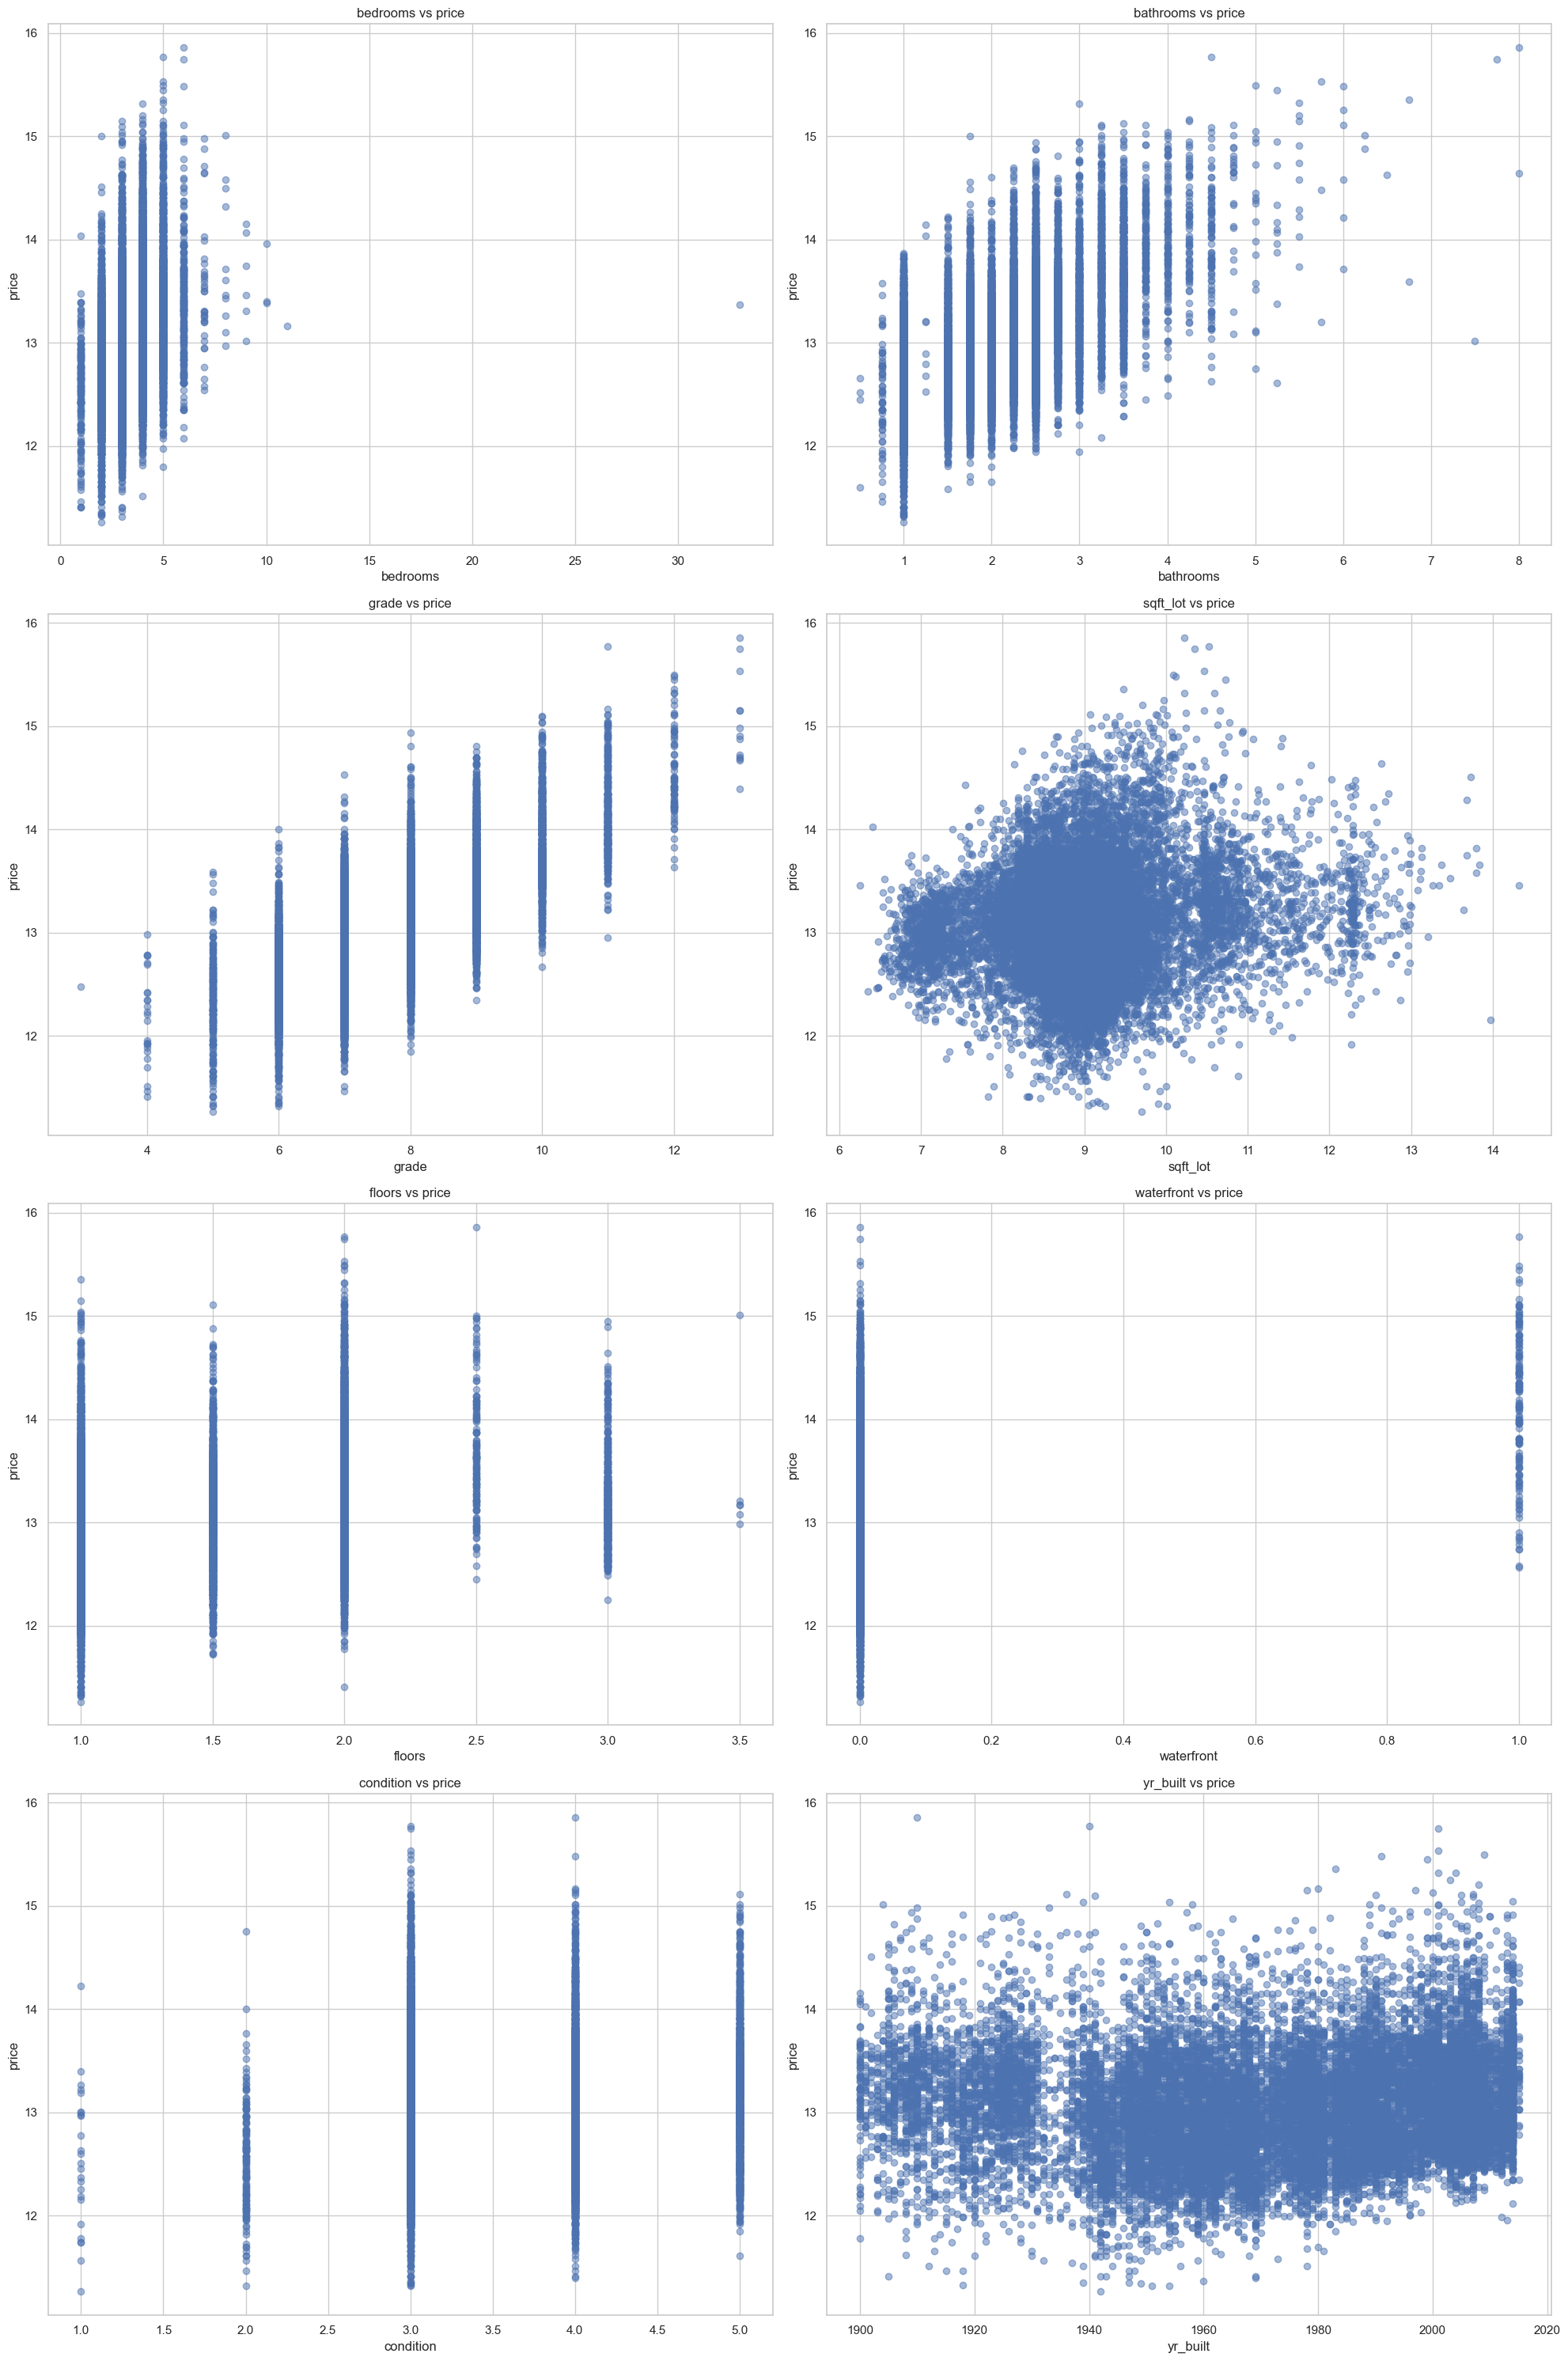

In [28]:
scatter_plots(house_df_copy, hist_columns)

From the above visuals some of the categorical variables from the dataset include;

Floors ,Waterfront ,Condition ,Grade ,Bedrooms ,Bathrooms

The spread from the scatter plot on grade,condition,bathrooms and bedrooms show some positive correlation with price.

In [29]:
#Using pandas to find the features that are most correlated with price 
house_df_copy.corr()['price'].sort_values()

condition     0.039115
yr_built      0.081930
sqft_lot      0.137750
waterfront    0.180524
floors        0.313799
bedrooms      0.344809
bathrooms     0.552195
grade         0.704847
price         1.000000
Name: price, dtype: float64

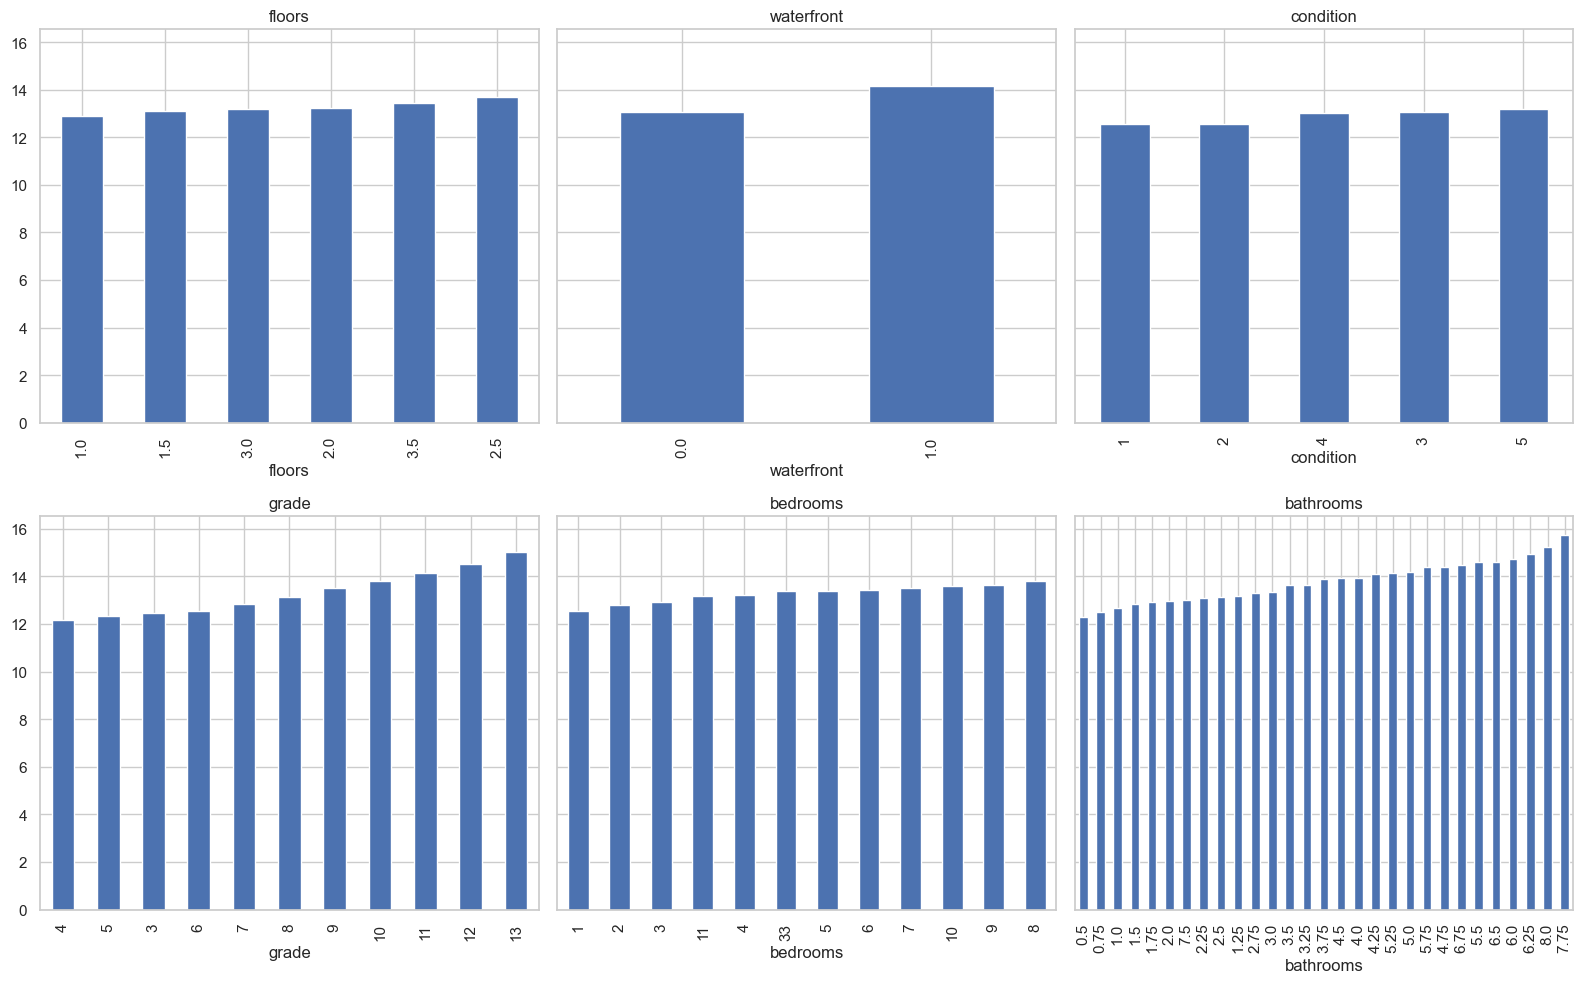

In [30]:
# Create bar plots
#segregating the visuals into two rows and 3 columns 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['floors', 'waterfront', 'condition', 'grade', 'bedrooms', 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (house_df_copy.groupby(col)               # group values together by column of interest
         .mean()['price']            # take the mean of the price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [31]:
# Verifying the houses with 33 bedrooms 
# filter the DataFrame based on 33 bedrooms
filtered_df = house_df_copy.loc[house_df_copy['bedrooms'] == 33]

# display the filtered DataFrame
print(filtered_df)

                price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
id                                                                         
2402100895  13.369223        33       1.75  8.699515     1.0         0.0   

            condition  grade  yr_built  
id                                      
2402100895          5      7      1947  


From the output a house with 33 bedrooms cant have 1 floor level ,1.75 bathrooms and have such a small sqft_living of 1620.
This would be treated as an outlier the data entry seems to be wrong hence droping this entry.

In [32]:
# droping the row that matched the condition
house_df_copy = house_df_copy.drop(filtered_df.index)

# display the updated DataFrame
print(house_df_copy)

                price  bedrooms  bathrooms   sqft_lot  floors  waterfront  \
id                                                                          
6414100192  13.195614         3       2.25   8.887653     2.0         0.0   
5631500400  12.100712         2       1.00   9.210340     1.0         0.0   
2487200875  13.311329         4       3.00   8.517193     1.0         0.0   
1954400510  13.142166         3       2.00   8.997147     1.0         0.0   
7237550310  14.022525         4       4.50  11.532042     1.0         0.0   
...               ...       ...        ...        ...     ...         ...   
2997800021  13.071070         3       2.50   7.165493     2.0         0.0   
263000018   12.793859         3       2.50   7.030857     3.0         0.0   
6600060120  12.899220         4       2.50   8.667852     2.0         0.0   
1523300141  12.904459         2       0.75   7.207860     2.0         0.0   
1523300157  12.691580         2       0.75   6.981006     2.0         0.0   

The dataset has one row less

sqft_living ,bathroom  are highly correlated to each other.

There are two sets of variables that are highly correlated.

sqft_living vs grade and bathrooms vs sqft_living.


### *Modelling the data* 

In [33]:
#Fitting a linear regression model to predict the 'price' using the feature 'grade'
X = house_df_copy[['grade']]
y = house_df_copy['price']

lm = LinearRegression()
lm.fit(X,y)
lm.score(X, y)

print('The predicted values are : ' + str(lm.predict(X)))
print('R-sqd for the linear regression model is : ' + str(lm.score(X,y)))

The predicted values are : [12.84056958 12.52445067 12.84056958 ... 13.1566885  12.84056958
 12.84056958]
R-sqd for the linear regression model is : 0.49685155281472115


C:\Users\Elsie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


We can see that it is positively correlated.


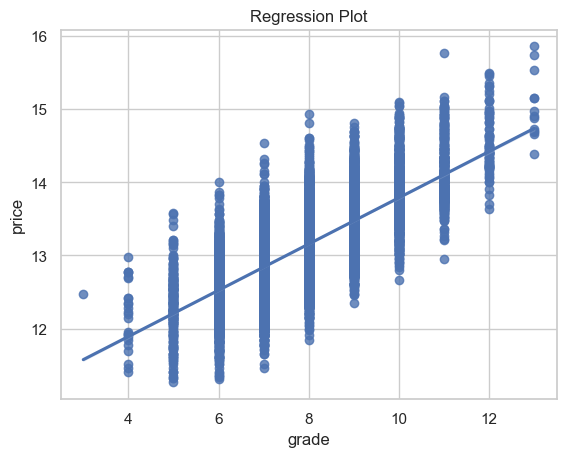

In [34]:
sns.regplot(dff_houses['grade'], house_df_copy['price'])
plt.title("Regression Plot")
print("We can see that it is positively correlated.")

plt.show()

Grade being the most correlated variable it affects the price of a house by 49.6% all other factors being constant.

As price increases the grade of the houses also increases proving the positive correlation between the two.

We can see that it is positively correlated.


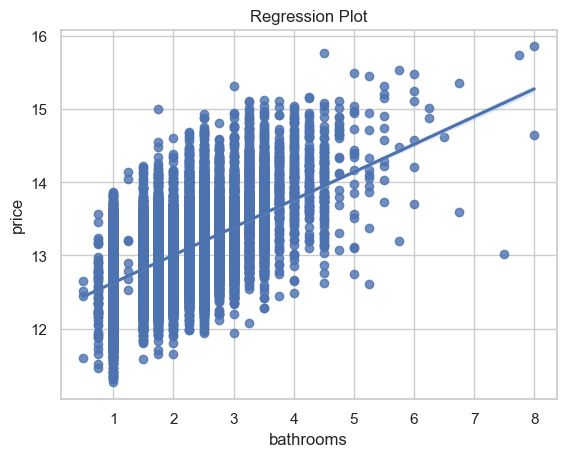

In [35]:
sns.regplot(house_df_copy['bathrooms'], house_df_copy['price'])
plt.title("Regression Plot")
print("We can see that it is positively correlated.")

As number of bathrooms increase the price of the houses also increases proving the positive correlation between the two.

In [36]:
# Fit a linear regression model to predict price using a list of other columns
#statsmodel
x_cols = ['bedrooms','bathrooms', 'grade', 'sqft_lot', 'floors','waterfront', 'condition','yr_built']

In [37]:
#y = dff_houses['price']
lm1 = LinearRegression()
lm1.fit(house_df_copy[x_cols],y)

print('The predicted values are : ' + str(lm1.predict(dff_houses[x_cols])))
print('R-sqd for the linear regression model is : ' + str(lm1.score(dff_houses[x_cols],y)))

The predicted values are : [13.00624137 12.53439493 13.08733965 ... 12.96400555 12.38635454
 12.39428442]
R-sqd for the linear regression model is : 0.6191828407723188


With change  of all other variables in consideration the amount of price is affected at 61.9%.Hence a model with all other variable in consideration will be built to predict price effectively.

In [38]:
#Defining the problem
# scikit model
outcome = 'price'

In [39]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=house_df_copy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3904.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:57:34   Log-Likelihood:                -5697.3
No. Observations:               19220   AIC:                         1.141e+04
Df Residuals:                   19211   BIC:                         1.148e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6001      0.204    110.699      0.000      22.200      23.000
bedrooms       0.0140      0.003      4.460      0.000       0.008       0.020
bathrooms      0.1686      0.005     34.175      0.000       0.159       0.178
grade          0.2966      0.003    104.646      0.000       0.291       0.302
sqft_lot      -0.0072      0.003     -2.496      0.013      -0.013      -0.002
floors         0.0615      0.006     10.596      0.000       0.050       0.073
waterfront     0.5814      0.027     21.258      0.000       0.528       0.635
condition      0.0438      0.004     11.152      0.000       0.036       0.052
yr_built      -0.0063      0.000    -60.586      0.000      -0.006      -0.006
==============================================================================
Omnibus:                       64.338   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.489
Skew:                          -0.037   Prob(JB):                     7.42e-19
Kurtosis:                       3.314   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Asessing the model
The model is not a good one because it has an r-squared of 0.617, which means that only 61.7% of the variation of price is explained by the model. The intercept coefficient is 22.6001, which represents the predicted value of price when all other independent variables are zero.
Despite the model being statistically significant with all the p-values being less than 0.05, normality in the data residuals, which is a regression assumption is violated. The is evident in Omnibus and J
Jarque-Bera test.
The Durbin-Watson statistic is used to detect the presence of autocorrelation in the residuals. In this case, the value of 1.971 suggests that there is little or no autocorrelation.

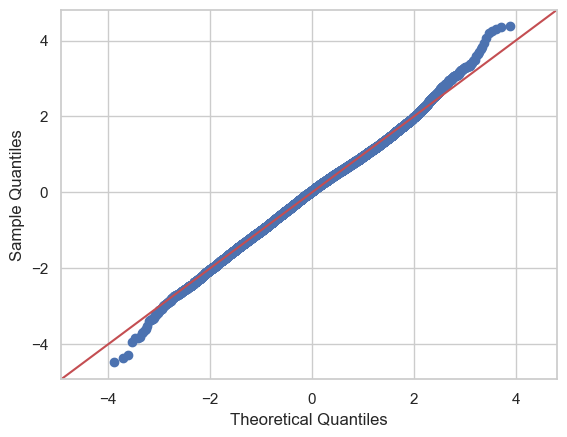

In [40]:
# Visualize normality using QQ plots
y = house_df_copy['price']
x = house_df_copy.drop(['price'],axis = 1)

# Get a list of column names
cols = x.columns.tolist()

# Join the column namems into a string with a '+' sign between them 
formula = f"price ~ {'+'.join(cols)}"

model1 = sm.formula.ols(formula = formula,data = house_df_copy).fit()

#visualize normality using qq plots
residuals = model1.resid
fig = sm.graphics.qqplot(residuals,dist = stats.norm,line = '45',fit = True)

In [41]:
# creating a variable input with first elements in tuple is the name of estimator while second  contains model estimators
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias = False)),('model',LinearRegression())]

In [42]:
#Creating a pipeline object to predict the price fit using the x_cols
pipe = Pipeline(Input)

xx = house_df_copy[x_cols]
pipe.fit(house_df_copy[x_cols],y)
print('The predicted values are :' + str(pipe.predict(house_df_copy[x_cols])))
print('Rsqd values is :' + str(pipe.score(house_df_copy[x_cols],y)))

The predicted values are :[12.8941834  12.52972746 13.07161379 ... 12.99656081 12.34617019
 12.35448802]
Rsqd values is :0.631507303768712


The is a notable improvement using the in the goodness of fit using a polynomial model from a 0.47 to 0.6179

#### *data transformation*

In [43]:
# splitting the data into train and test data sets
x_colss = ['bedrooms','bathrooms', 'grade', 'sqft_lot', 'floors','waterfront', 'condition','yr_built']
x = house_df_copy[x_colss]
y = house_df_copy['price']

#x = dff_houses_preprocessed.drop('price', axis=1)
#y = dff_houses_preprocessed['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state =1)

print('number of test samples:',x_test.shape[0])
print('number of training samples: ',x_train.shape[0])

number of test samples: 4805
number of training samples:  14415


In [44]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

14415 4805 14415 4805


In [45]:
x_train

,bedrooms,bathrooms,grade,sqft_lot,floors,waterfront,condition,yr_built
id,,,,,,,,
5209200010,3,1.50,7,8.968651,1.0,0.0,3,1962
5095400040,3,1.00,7,9.510445,1.0,0.0,4,1968
3630120480,3,2.50,9,8.153350,2.0,0.0,3,2006
4131900066,3,3.00,11,9.479222,2.0,1.0,4,1996
686450330,4,2.25,8,9.405496,1.0,0.0,4,1968
...,...,...,...,...,...,...,...,...
686800070,5,2.50,9,9.946308,1.0,0.0,4,1953
7852010900,3,2.50,8,8.729397,2.0,0.0,3,1998
9141100255,2,2.25,8,10.286946,1.0,0.0,3,1953


In [46]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['floors', 'waterfront', 'condition', 'bedrooms', 'grade', 'bathrooms']

# Fit encoder on training set
ohe.fit(x_train[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train[cat_columns]),
                           columns=new_cat_columns, index=x_train.index)

# Replace training columns with transformed versions
x_train = pd.concat([x_train.drop(cat_columns, axis=1), x_train_ohe], axis=1)
x_train

C:\Users\Elsie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,sqft_lot,yr_built,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0.0,waterfront_1.0,...,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0
id,,,,,,,,,,,,,,,,,,,,,
5209200010,8.968651,1962,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5095400040,9.510445,1968,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3630120480,8.153350,2006,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4131900066,9.479222,1996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686450330,9.405496,1968,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686800070,9.946308,1953,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7852010900,8.729397,1998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9141100255,10.286946,1953,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Transform testing set
x_test_ohe = pd.DataFrame(ohe.transform(x_test[cat_columns]),
                           columns=new_cat_columns, index=x_test.index)

# Replace testing columns with transformed versions
x_test = pd.concat([x_test.drop(cat_columns, axis=1), x_test_ohe], axis=1)
x_test

,sqft_lot,yr_built,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0.0,waterfront_1.0,...,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0
id,,,,,,,,,,,,,,,,,,,,,
984220240,8.932609,1975,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1402000210,10.357648,1964,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6632300477,8.893984,1959,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8137500730,10.533828,1987,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259000100,8.974618,1960,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423069095,11.598185,1977,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4359100050,9.172119,1963,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2787700150,8.883224,1969,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### *Model evaluation and validating*

In [48]:
# Fitting a linear ridge model
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
print("The predicted values are : " + str(RidgeModel.predict(x_test)))

print("The Rsqd Score value is: " + str(RidgeModel.score(x_test, y_test)))

The predicted values are : [12.85630056 13.18409146 12.66532412 ... 12.98647275 12.27233443
 12.93602145]
The Rsqd Score value is: 0.6157937351252156


In [49]:
# Overfitting with a diffrent model polynomial model)
pr = PolynomialFeatures(degree = 1)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score value for the training data is : " + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_pr, y_test)))

The R^2 Score value for the training data is : 0.6282623705158872
The R^2 Score value for the testing data is : 0.6157937351252153


In [50]:
# Overfitting with a diffrent model polynomial model)
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

print("The R^2 Score value for the training data is : " + str(RidgeModel.score(x_train_pr, y_train)))
print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_pr, y_test)))

The R^2 Score value for the training data is : 0.6612414817701211
The R^2 Score value for the testing data is : 0.5998130394453727


Train R-squared: 0.6430815412512239
Test R-squared: 0.644954224982312


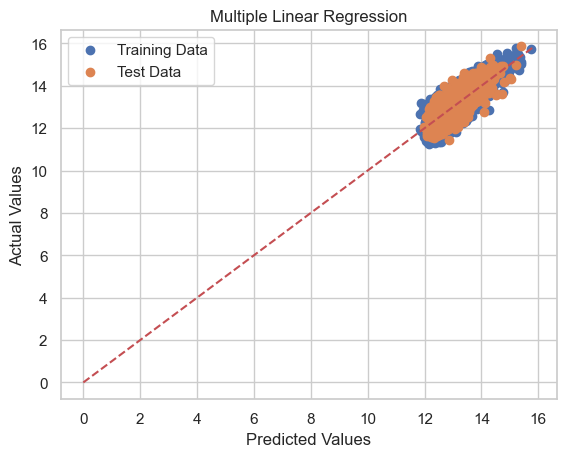

In [51]:
# select variables
continuous = ['sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'floors','grade','waterfront','condition','yr_built']
target = 'price'
X = house_df_copy[continuous + categoricals]
y = house_df_copy[target]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# one-hot encoding of categorical variables
ohe = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categoricals)
], remainder='passthrough')

# fit and transform train data
X_train_enc = ohe.fit_transform(X_train)

# transform test data
X_test_enc = ohe.transform(X_test)

# instantiate linear regression model
linreg = LinearRegression()

# fit model to train data
linreg.fit(X_train_enc, y_train)

# predict on train and test data
y_train_pred = linreg.predict(X_train_enc)
y_test_pred = linreg.predict(X_test_enc)

# evaluate model using r squared metric
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train R-squared:', train_r2)
print('Test R-squared:', test_r2)

# visualize model by plotting predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_train_pred, y_train, label='Training Data')
ax.scatter(y_test_pred, y_test, label='Test Data')
ax.plot([0, np.max(y)], [0, np.max(y)], linestyle='--', color='r')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Multiple Linear Regression')
ax.legend()
plt.show()

### *Interpreting the data*

The Rsqd of both the training data and testing data seem to be at close range  this is verified by the graph of the
overfitting of both sets having a good fit. Meaning the model is efficient.To increase the efficiency of the pricing the 
should be itterated as seen from the Rsqd iteraction which is higher  meaning the relation of the attributed to the pricing 
higher ,upto 3 iterations.

The preffered model from the project is the polynomial model of 2 iterations since it has the hihest Rsqd compared to the others meaning the performance of the price prediction is well of ,also the contibution of the attributes to the price level in this model is considered unlike the first linear model where only one attribute was considered.